In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# taking the data
raw_data = pd.read_excel('data_raw.xlsx')
raw_data.head()

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364


In [3]:
# making a copy of data
df = raw_data.copy()

In [4]:
# checking top 5 rows
df.head()

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364


In [5]:
# checking bottom 5 rows
df.tail()

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn
14588,XYZ,T1BH000274012,2023-02-22,381700,0,2860000,126
14589,XYZ,T1NH000575414,2023-02-22,452500,565,3520000,134
14590,PQR,S1CN2011,2023-02-22,0,0,3520000,0
14591,XYZ,T1BH007252090,2023-02-22,137600,0,3520000,73
14592,XYZ,T1BH000003039,2023-02-22,419000,0,3520000,92


In [6]:
# checking random 5 values
df.sample(5)

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn
10078,ABC,SPCN02020,2022-07-23,660000,390,2640000,126
8608,ABC,SPCN02020,2022-05-12,736500,366,2640000,161
4749,PQR,S1CN3514,2021-10-27,461000,0,3520000,137
3268,PQR,SPCND067,2021-08-07,617500,17,3520000,99
12943,PQR,S1CN3514,2022-12-06,403000,316,3520000,131


In [7]:
# check the shape of data
df.shape

(14593, 7)

In [8]:
# checking entire information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bank           14593 non-null  object        
 1   ATMID          14593 non-null  object        
 2   Caldate        14593 non-null  datetime64[ns]
 3   Dispense       14593 non-null  int64         
 4   DT             14593 non-null  int64         
 5   MaxCapacity    14593 non-null  int64         
 6   CountTotalTxn  14593 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 798.2+ KB


from above we can see that no null/missing values in the data.

In [9]:
# check for any duplicates
df.duplicated().sum()

0

In [10]:
# We will extract some features from 'Caldate'
df['Day_of_Week'] = df['Caldate'].dt.dayofweek
df['Day_of_Month'] = df['Caldate'].dt.day
df['Month'] = df['Caldate'].dt.month

In [11]:
# check for df
df.head()

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn,Day_of_Week,Day_of_Month,Month
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157,4,1,1
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92,4,1,1
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36,4,1,1
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101,4,1,1
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364,4,1,1


In [12]:
df[:2]

,Bank,ATMID,Caldate,Dispense,DT,MaxCapacity,CountTotalTxn,Day_of_Week,Day_of_Month,Month
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157,4,1,1
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92,4,1,1


# EDA

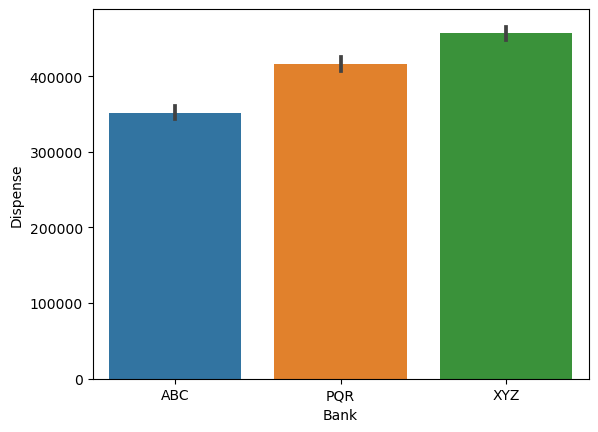

In [13]:
# variation of dispense w.r.t.Bank
sns.barplot(x = 'Bank',y = 'Dispense',data = df)
plt.show()

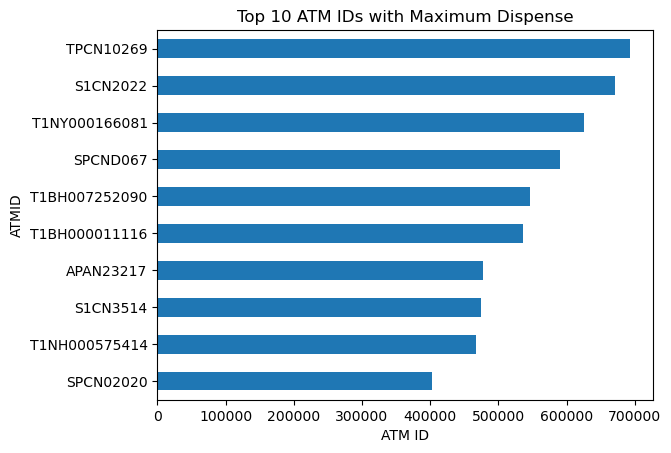

In [14]:
# variation of Dispense with ATM
df.groupby('ATMID')['Dispense'].mean().nlargest(10)[::-1].plot.barh()
plt.title('Top 10 ATM IDs with Maximum Dispense')
plt.xlabel('ATM ID')
plt.show()

<AxesSubplot:xlabel='DT', ylabel='Dispense'>

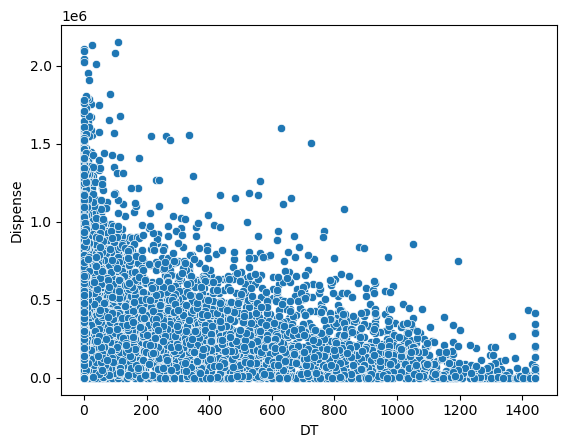

In [15]:
sns.scatterplot(x = 'DT',y = 'Dispense',data = df)

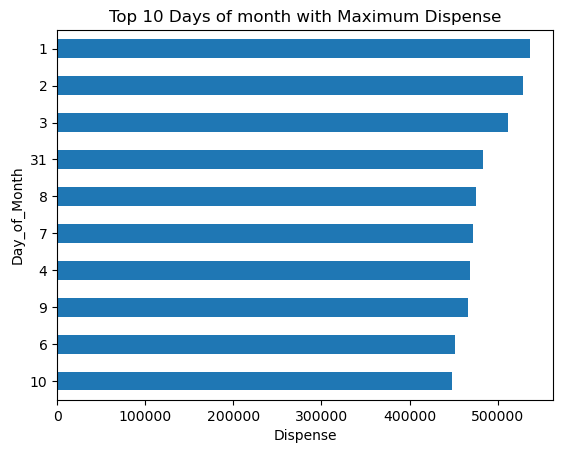

In [16]:
df.groupby('Day_of_Month')['Dispense'].mean().nlargest(10)[::-1].plot.barh()
plt.title('Top 10 Days of month with Maximum Dispense')
plt.xlabel('Dispense')
plt.show()
plt.show()

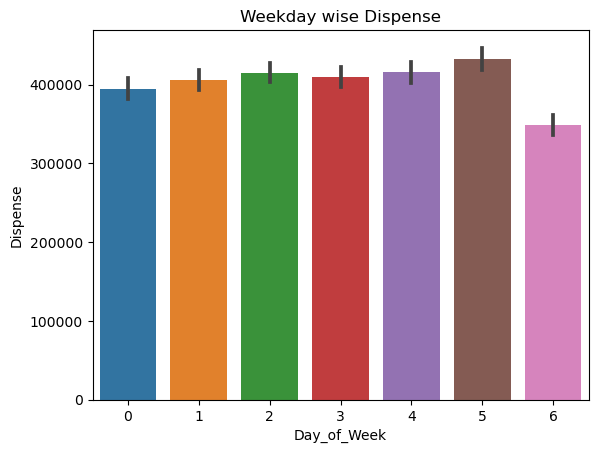

In [17]:
sns.barplot(x ='Day_of_Week',y = 'Dispense',data = df)
plt.title('Weekday wise Dispense')
plt.show()

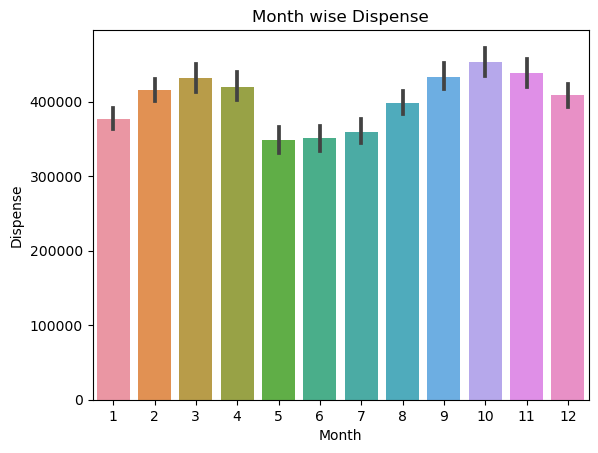

In [18]:
sns.barplot(x ='Month',y = 'Dispense',data = df)
plt.title('Month wise Dispense')
plt.show()

### Insights from the above analysis

- Maximum cash is withdrawn from ATM of XYZ Bank.
- Machines with higher downtime (DT) tend to have lower dispense.
- Generally, in the first week of the month, maximum cash is withdrawn, especially on the first 2-3 days, which may be due to most customers receiving their salary on these dates.
- Saturdays represent the peak of ATM cash withdrawals, with Sundays being the slowest. Cash usage on other weekdays is fairly uniform.
- The dispensation rate escalates during the period from September to November, which could be credited to the presence of festivals and holidays such as Diwali and Christmas
- During summertime, the dispense rate falls, potentially because people avoid going out.

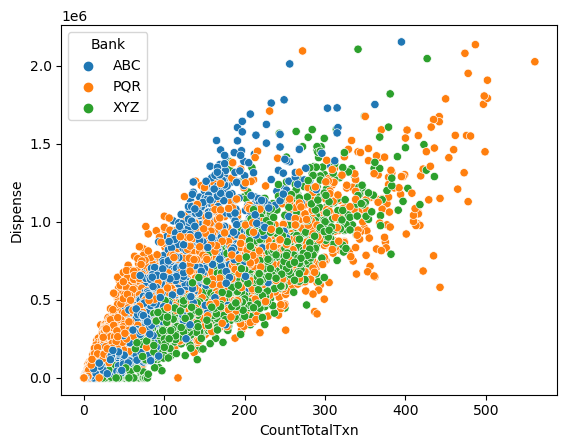

In [19]:
sns.scatterplot(x = df.CountTotalTxn,y = df.Dispense,hue=df.Bank)
plt.show()

Based on the scatter plot, we can observe a clear linear relationship between the total number of transactions (CountTotalTxn) and the amount of cash withdrawn (Dispense) for all banks' ATMs. This indicates that as the number of transactions increases, the cash dispensed also increases. This relationship holds true across all banks. 

In [20]:
corlation_df = df.corr()
corlation_df['Dispense'].sort_values(ascending=False)

Dispense         1.000000
CountTotalTxn    0.860051
MaxCapacity      0.163508
Month            0.039658
Day_of_Week     -0.019515
Day_of_Month    -0.167740
DT              -0.359896
Name: Dispense, dtype: float64

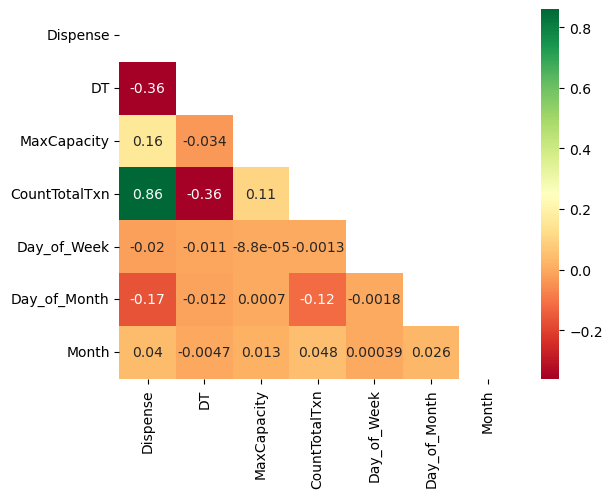

In [21]:
sns.heatmap(corlation_df,annot=True,cmap='RdYlGn',mask=np.triu(corlation_df))
plt.show()

- From the correlation matrix, it can be observed that the "Total Transactions" feature has the highest correlation with the "Dispense" feature. This indicates that there is a strong positive relationship between the total number of transactions and the amount of cash withdrawn.

- It is important to note that correlation does not imply causation, but in this case, it suggests that as the number of transactions increases, the amount of cash withdrawn also tends to increase. This could be attributed to the fact that more transactions generally result in a higher demand for cash.

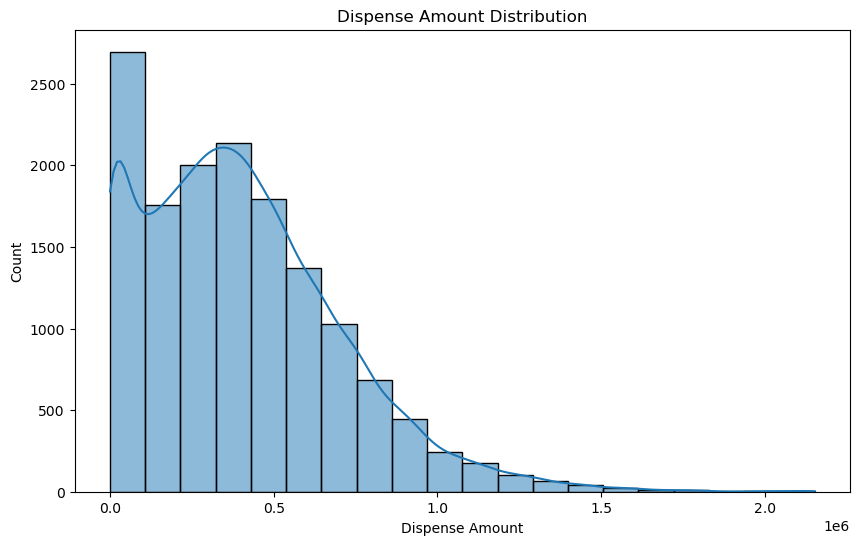

In [22]:
# Dispense amount distribution by ATM
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Dispense', bins=20,kde=True)
plt.xlabel('Dispense Amount')
plt.ylabel('Count')
plt.title('Dispense Amount Distribution')
plt.show()

## Model Development

In [24]:
# Sort the data by date
df.sort_values('Caldate', inplace=True)

# Create a separate DataFrame for each ATM
atm_data = df.groupby('ATMID')

forecast_data = []

# Iterate over each ATM
for atm_id, atm_df in atm_data:
    # Prepare the data for time series analysis
    atm_series = atm_df.set_index('Caldate')['Dispense']
    
    # Split the data into training and testing sets
    train_data = atm_series[:-7]  # Use all data except the last 7 days for training
    test_data = atm_series[-7:]  # Use the last 7 days for testing
    
    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 0, 0))  
    model_fit = model.fit()
    
    # Forecast the dispense amount for the next 7 days
    forecast = model_fit.forecast(steps=7)
    forecast_values = forecast[0].round()
    
    # Append the forecasted data to the list
    forecast_data.append({'ATMID': atm_id, 'Forecasted Dispense': forecast_values})

# Create a DataFrame from the forecasted data list
forecast_df = pd.DataFrame(forecast_data)

forecast_df

,ATMID,Forecasted Dispense
0,APAN11109,447258.0
1,APAN22403,469864.0
2,APAN23217,446777.0
3,APAN35706,111655.0
4,APCN00816,112756.0
5,S1CN1142,230256.0
6,S1CN2011,138829.0
7,S1CN2022,609388.0
8,S1CN2820,469001.0
9,S1CN3514,607354.0


In [25]:
# Save the DataFrame to a CSV file
forecast_df.to_csv('forecasted_values.csv', index=False)

### Finding the error

In [26]:
# Convert test_data to an array
test_data = np.array(test_data)

# Ensure forecast_values is not empty and has the correct number of values
forecast_values = np.array([data['Forecasted Dispense'] for data in forecast_data])

# Keep only the necessary number of forecast values
forecast_values = forecast_values[:len(test_data)]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 285869.5714285714


The advantage of using MAE is that it gives equal weight to all errors and does not penalize large errors more than small errors. This makes it a suitable choice when you want to have a balanced view of the overall forecasting accuracy.

In contrast, metrics like Mean Squared Error (MSE) penalize large errors more heavily because they square the differences. This can make MSE more sensitive to outliers or extreme values in the data.

By minimizing the MAE, you aim to find the model that, on average, has the smallest difference between the actual and predicted values. It provides a straightforward and interpretable measure of the model's performance.

#### Solution which will help the operations team to manage cash loading of the ATMs

In [27]:

# Calculate the dispense statistics for each ATM
atm_stats = df.groupby('ATMID')['Dispense'].agg(['mean', 'std', 'min', 'max', 'count'])

# Calculate the average dispense amount for each bank
bank_avg_dispense = df.groupby('Bank')['Dispense'].mean()

# Identify ATMs with low dispense amounts
low_dispense_atms = atm_stats[atm_stats['mean'] < bank_avg_dispense.mean()]

# Calculate the cash holding duration for each ATM
df['DispenseDate'] = pd.to_datetime(df['Caldate'])
df.sort_values(['ATMID', 'DispenseDate'], inplace=True)
df['CashHoldingDays'] = df.groupby('ATMID')['DispenseDate'].diff().dt.days

# Identify ATMs with cash holding duration less than 7 days
insufficient_cash_atms = df[df['CashHoldingDays'] < 7]['ATMID'].unique()

# Generate recommendations for cash loading
recommendations = {}

for atm_id in low_dispense_atms.index:
    if atm_id in insufficient_cash_atms:
        recommendation = "Urgent cash loading required"
    else:
        recommendation = "Monitor cash levels"
    recommendations[atm_id] = recommendation

# Print the recommendations
for atm_id, recommendation in recommendations.items():
    print("ATMID:", atm_id)
    print("Recommendation:", recommendation)
    print()



ATMID: APAN11109
Recommendation: Urgent cash loading required

ATMID: APAN22403
Recommendation: Urgent cash loading required

ATMID: APAN35706
Recommendation: Urgent cash loading required

ATMID: APCN00816
Recommendation: Urgent cash loading required

ATMID: S1CN1142
Recommendation: Urgent cash loading required

ATMID: S1CN2011
Recommendation: Urgent cash loading required

ATMID: S1CN2820
Recommendation: Urgent cash loading required

ATMID: SPCN02020
Recommendation: Urgent cash loading required

ATMID: SPCNG376
Recommendation: Urgent cash loading required

ATMID: T1BH000003039
Recommendation: Urgent cash loading required

ATMID: T1BH000274012
Recommendation: Urgent cash loading required

ATMID: T1BH000603091
Recommendation: Urgent cash loading required

